In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/Baseline Data.csv')

# List all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)

Columns in the dataset:
Subject
Time
Region
Residence
ch_sex
ch_age_mon
BMI
ch_longterm_health_problem
ch_health_compared_peers
ch_health_general_new
CSW
Care_Edu_New
care_rln_head
care_age
care_sex
CGSW
Dad_Edu_New
mom_live_location
mom_age
MOM_Edu_New
Head_Edu_New
head_age
head_sex
hh_size
Wealth_quintile
Access_to_safe_drinking_water
toiletq_new
Access_to_electricity
cookingq_new
Ethnic_group
ch_religion
Num_antenatal_visits
BCG
Measles
DPT
Polio
HIB
delivery
chinjury
dadlive
dadage
Head_Rela
Nutrition_Status


C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_before, label='Before Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_after, label='After Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_before, label='Before Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:60: FutureWarning: 

`

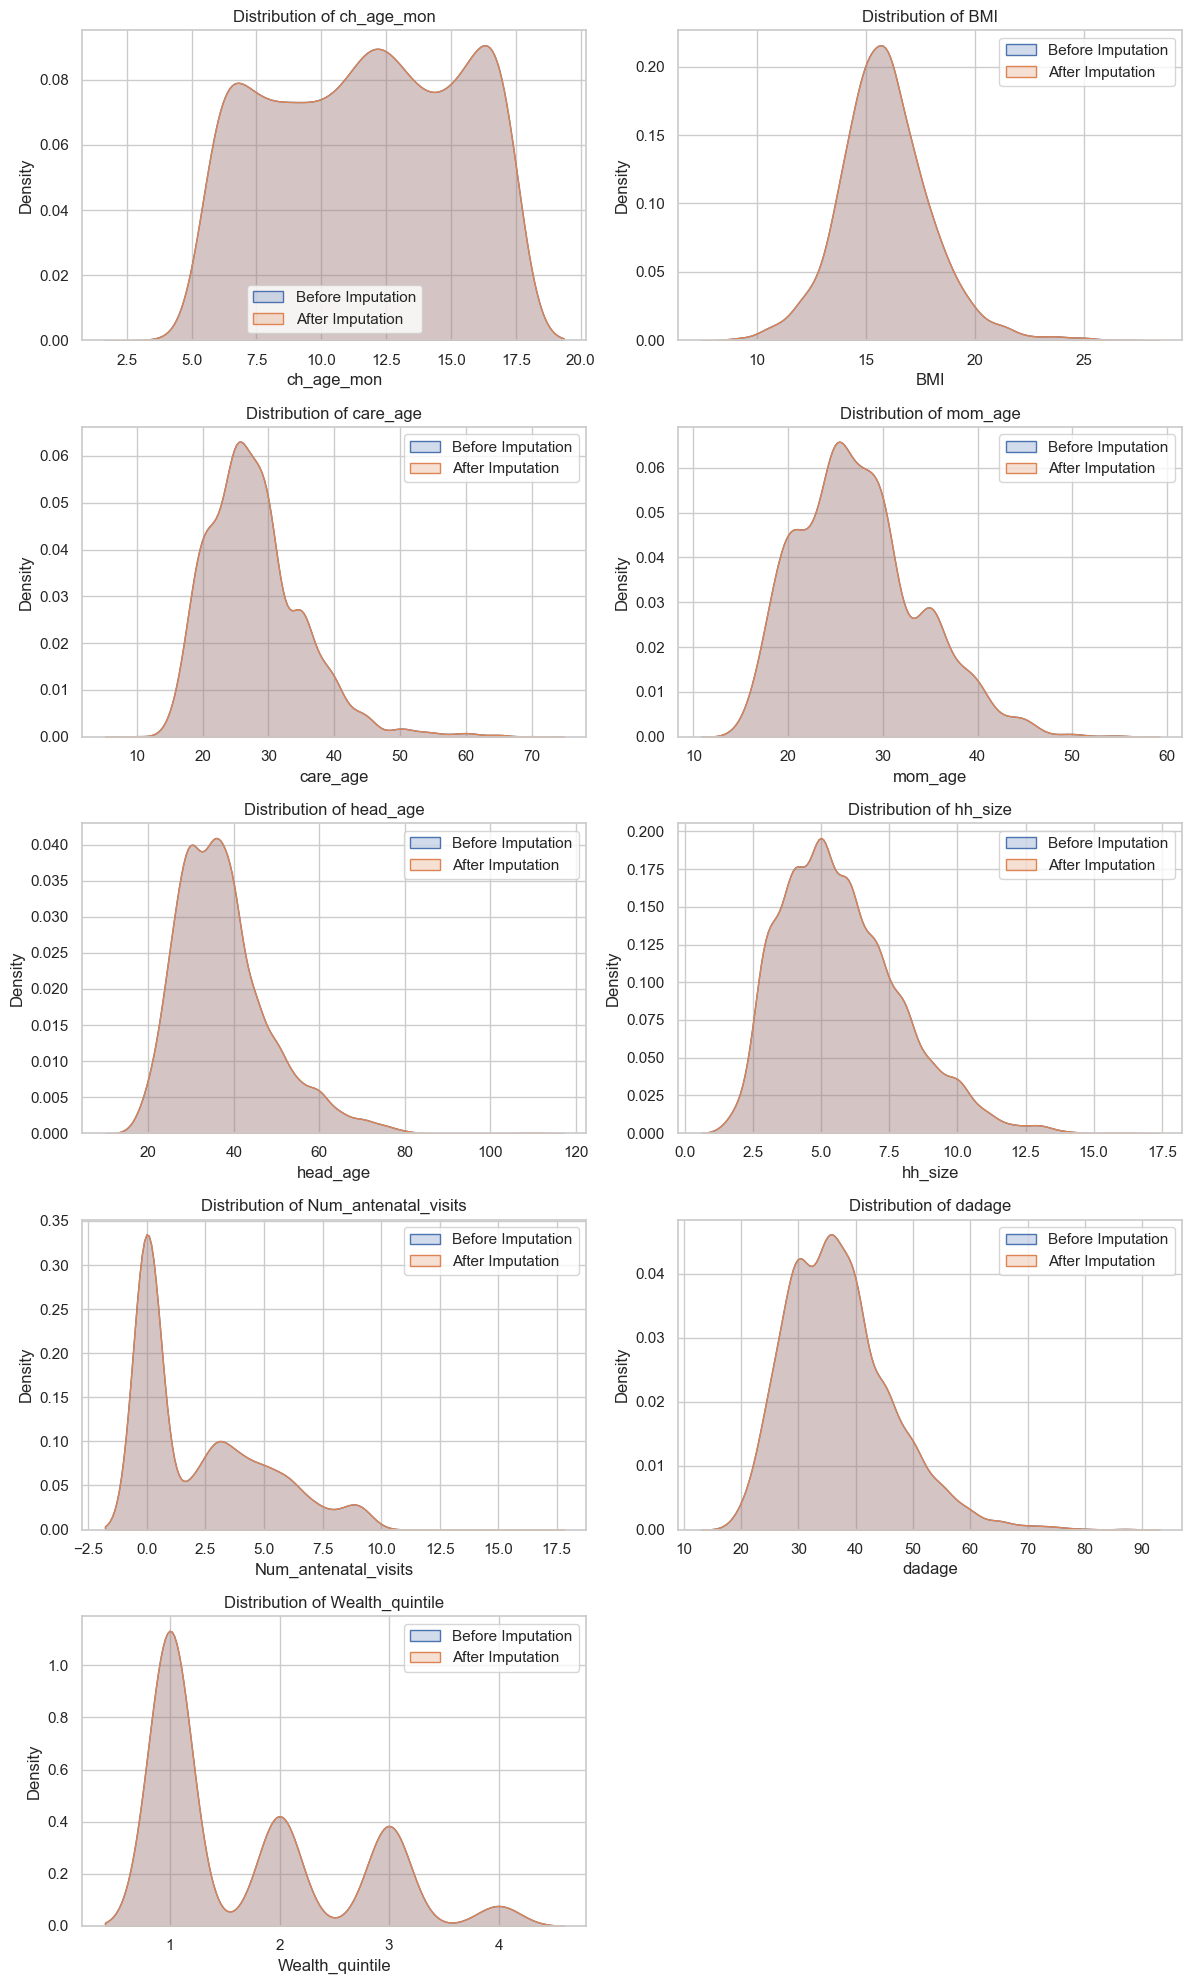

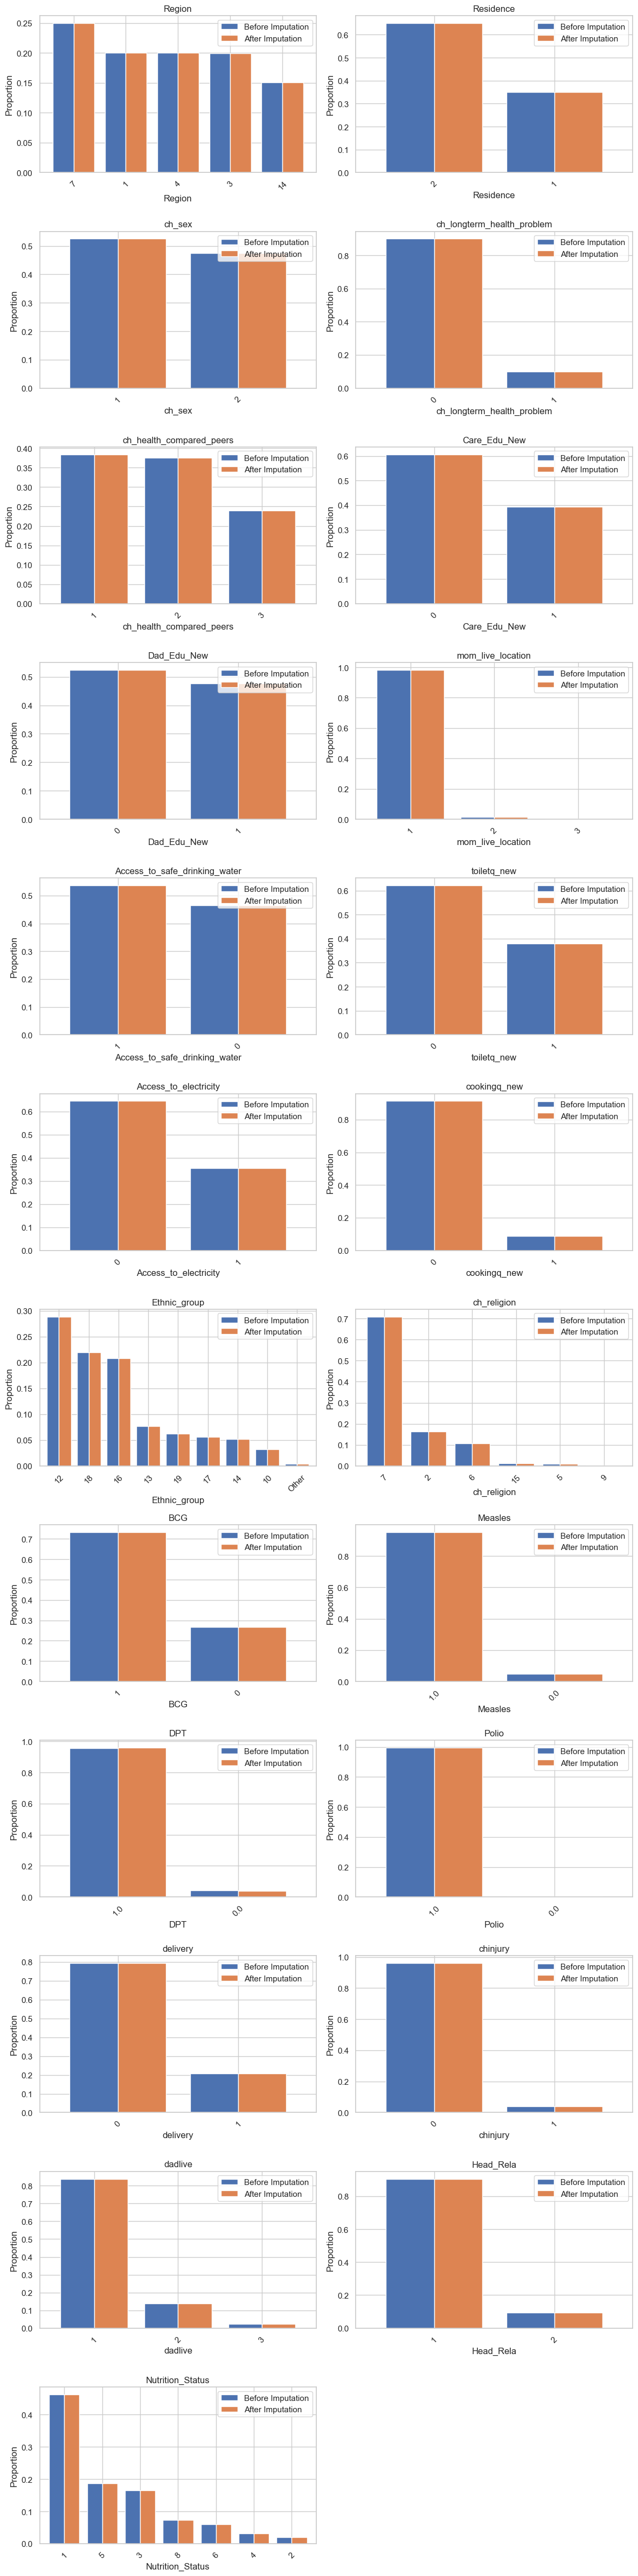

C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_before, label='Before Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_after, label='After Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_before, label='Before Imputation', shade=True, ax=axes[i])
C:\Users\Getnet\AppData\Local\Temp\ipykernel_14732\1460006052.py:60: FutureWarning: 

`

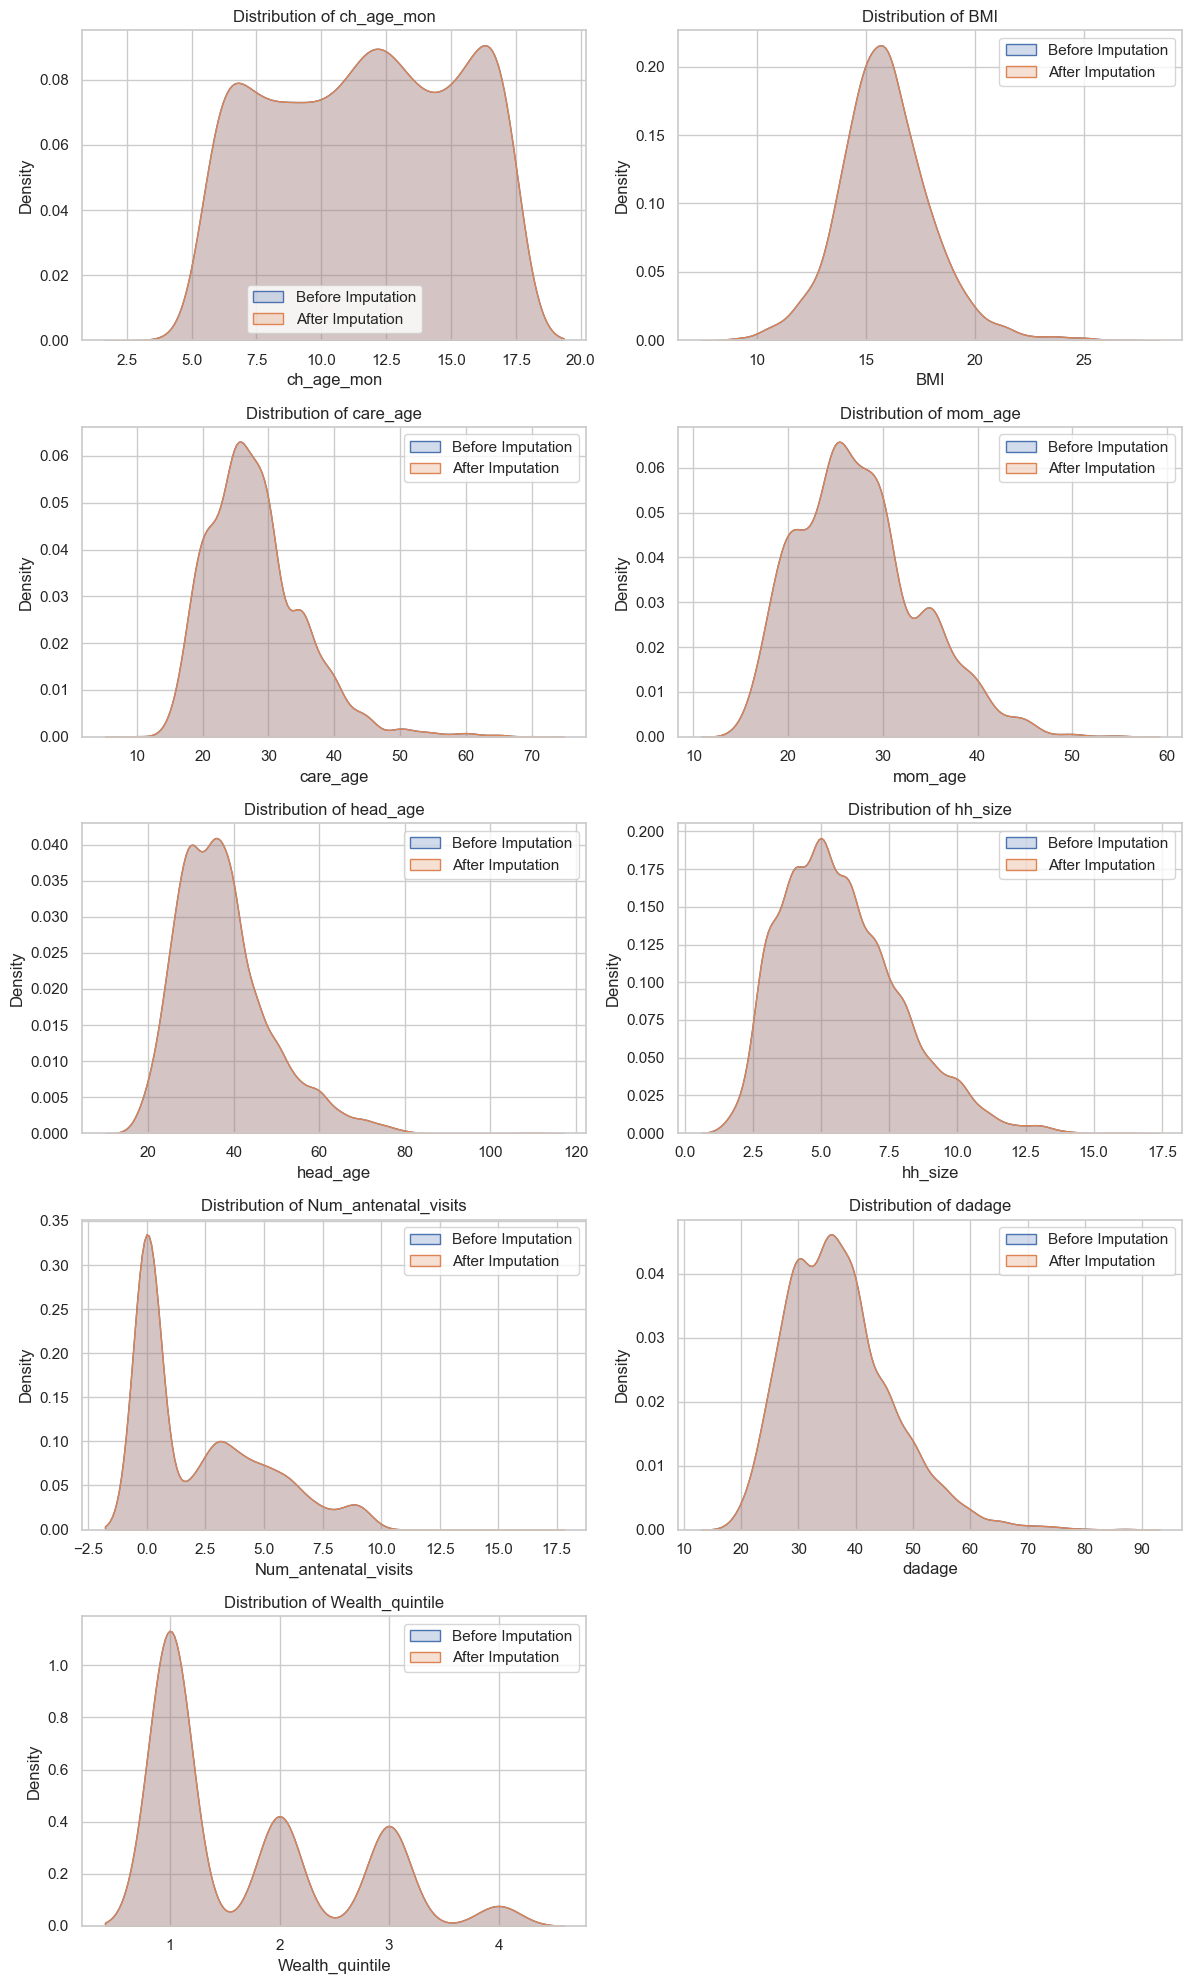

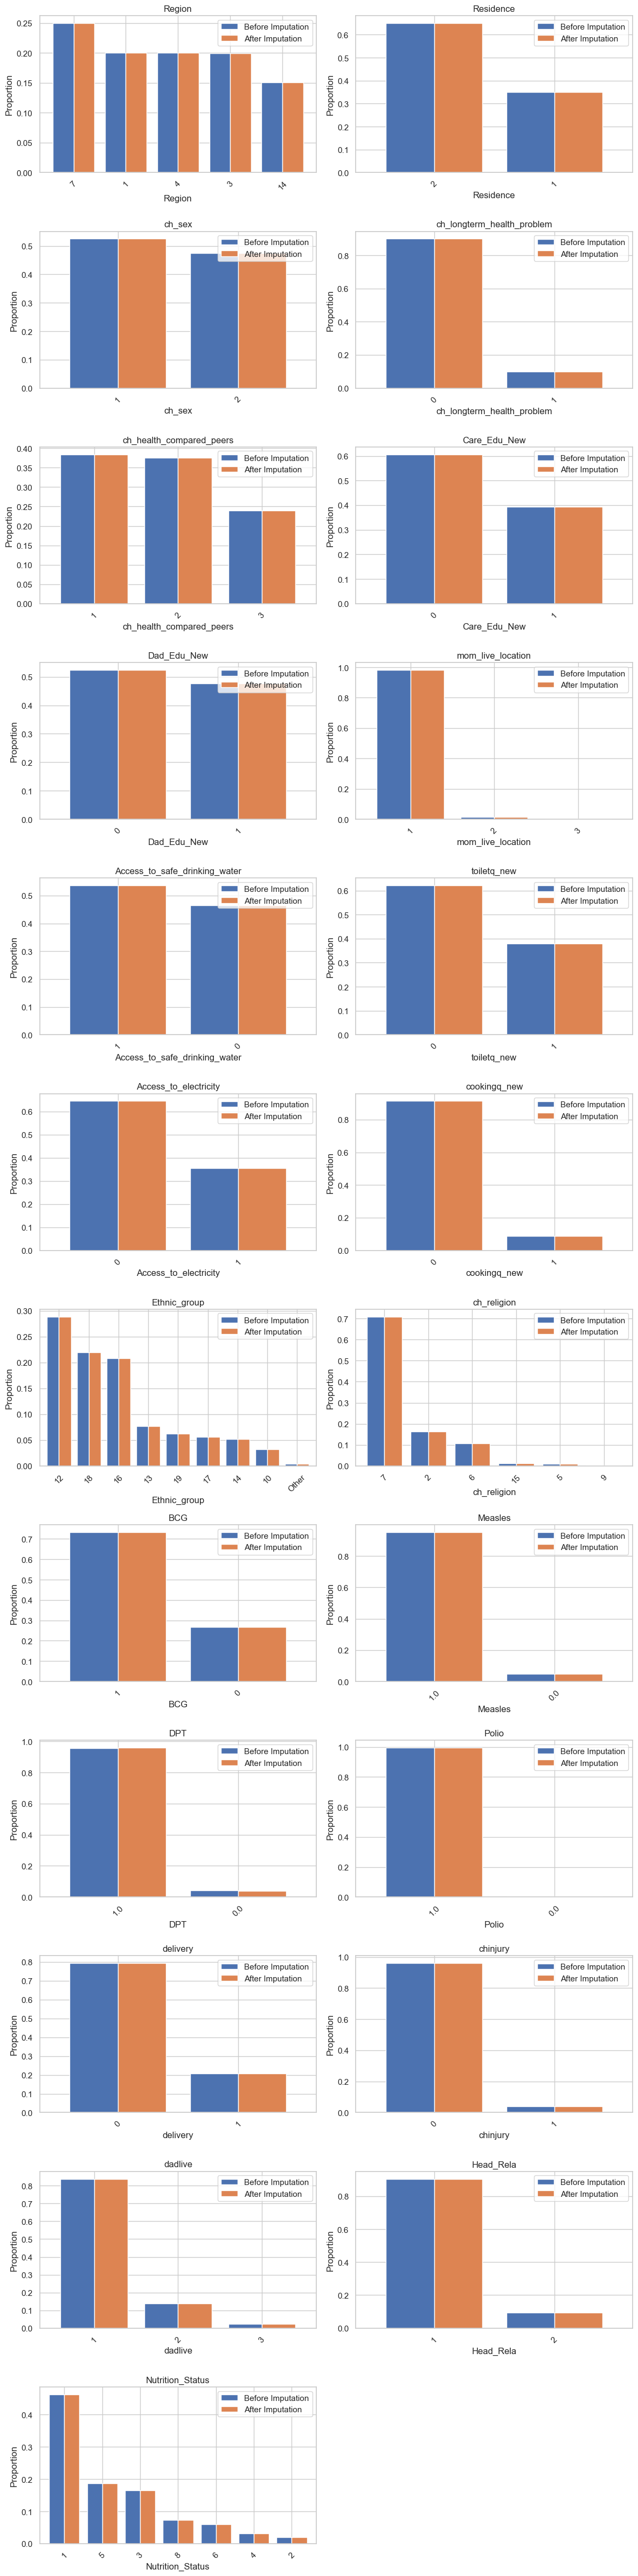

In [ ]:
# Numerical + Categorical before/after imputation plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages

# ---- load data (notebook 'my' -> dataset in ../data/) ----
df_before = pd.read_csv('../data/Baseline Data.csv')
df_after = df_before.copy()

# ---- Numerical columns to visualize (adjust if needed) ----
numerical_cols = [
    'ch_age_mon','BMI','care_age','mom_age','head_age',
    'Num_antenatal_visits','dadage'
]
numerical_cols = [c for c in numerical_cols if c in df_after.columns]

# mean imputation for numeric cols (as in manuscript)
for col in numerical_cols:
    df_after[col].fillna(df_after[col].mean(), inplace=True)

# ---- Categorical columns to visualize (representative selection) ----
categorical_cols = [
    'Region','Residence','ch_sex','ch_longterm_health_problem',
    'ch_health_compared_peers','Care_Edu_New','Dad_Edu_New',
    'mom_live_location', 'hh_size', 'Wealth_quintile', 'Access_to_safe_drinking_water','toiletq_new',
    'Access_to_electricity','cookingq_new','Ethnic_group','ch_religion',
    'BCG','Measles','DPT','Polio','delivery','chinjury','dadlive',
    'Head_Rela','Nutrition_Status'
]
categorical_cols = [c for c in categorical_cols if c in df_after.columns]

# mode imputation for categorical cols
for col in categorical_cols:
    if df_after[col].isnull().sum() > 0:
        df_after[col].fillna(df_after[col].mode().iloc[0], inplace=True)

# ---- Helper to collapse low-frequency categories ----
def topn_with_other(series, top_n=8):
    counts = series.value_counts()
    top = counts.nlargest(top_n).index
    return series.apply(lambda x: x if x in top else 'Other')

sns.set(style="whitegrid")

# ---------- Create numeric density figure (Supplementary Figure S1) ----------
def save_numeric_density(cols, outpath='../data/supplementary_numeric_distributions.png', n_cols=2):
    n_rows = math.ceil(len(cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        # ensure numeric
        series_before = pd.to_numeric(df_before[col], errors='coerce').dropna()
        series_after = pd.to_numeric(df_after[col], errors='coerce').dropna()
        if len(series_before) < 2:
            axes[i].text(0.5, 0.5, f'Not enough data for {col}', ha='center')
        else:
            sns.kdeplot(series_before, label='Before Imputation', shade=True, ax=axes[i])
            sns.kdeplot(series_after, label='After Imputation', shade=True, ax=axes[i])
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
            axes[i].legend()
        axes[i].set_title(f'Distribution of {col}')
    # remove empty axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    fig.savefig(outpath, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

save_numeric_density(numerical_cols, outpath='../data/supplementary_numeric_distributions.png', n_cols=2)

# ---------- Create categorical proportions figure (Supplementary Figure S2) ----------
def save_categorical_proportions(cols, outpath='../data/supplementary_categorical_distributions.png', n_cols=2, top_n=8):
    n_rows = math.ceil(len(cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        ax = axes[i]
        before_series = topn_with_other(df_before[col].dropna().astype(str), top_n=top_n)
        after_series = topn_with_other(df_after[col].astype(str), top_n=top_n)
        before_counts = before_series.value_counts(normalize=True).sort_index()
        after_counts = after_series.value_counts(normalize=True).sort_index()
        combined = pd.DataFrame({
            'Before Imputation': before_counts,
            'After Imputation' : after_counts
        }).fillna(0)
        # Order categories for readability: by before counts descending
        combined = combined.loc[combined['Before Imputation'].sort_values(ascending=False).index]
        combined.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title(col)
        ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    fig.savefig(outpath, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

save_categorical_proportions(categorical_cols, outpath='../data/supplementary_categorical_distributions.png', n_cols=2, top_n=8)

# ---------- OPTIONAL: Save both figures to one multipage PDF ----------
with PdfPages('../data/supplementary_imputation_plots.pdf') as pdf:
    # numeric
    n_rows = math.ceil(len(numerical_cols)/2)
    fig_num, ax_num = plt.subplots(n_rows, 2, figsize=(12, n_rows*4))
    plt.close(fig_num)
    # Recreate numeric fig but save to pdf pages (one page)
    save_numeric_density(numerical_cols, outpath='../data/_tmp_numeric.png', n_cols=2)
    img = plt.imread('../data/_tmp_numeric.png')
    fig = plt.figure(figsize=(12, n_rows*4))
    plt.imshow(img); plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight'); plt.close(fig)
    # categorical page
    save_categorical_proportions(categorical_cols, outpath='../data/_tmp_categorical.png', n_cols=2, top_n=8)
    img2 = plt.imread('../data/_tmp_categorical.png')
    fig2 = plt.figure(figsize=(12, math.ceil(len(categorical_cols)/2)*4))
    plt.imshow(img2); plt.axis('off')
    pdf.savefig(fig2, bbox_inches='tight'); plt.close(fig2)

print("Saved: ../data/supplementary_numeric_distributions.png")
print("Saved: ../data/supplementary_categorical_distributions.png")
print("Saved: ../data/supplementary_imputation_plots.pdf  (combined)")